### pycaret

In [2]:
import numpy as np 
import pandas as pd

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/test.csv
/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/._test.csv
/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/train.csv
/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/._train.csv
/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/sample_submission.csv
/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/._sample_submission.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#!pip install pycaret[full]

zsh:1: no matches found: pycaret[full]


In [26]:
#!pip install scipy

In [6]:
sub=pd.read_csv("/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/sample_submission.csv")

In [7]:
train_data=pd.read_csv("/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/train.csv")
train_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,40,75,16.5,1,1.0,22,25,27,0,1
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,57,126,16.2,1,1.1,27,23,37,1,0
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,45,93,17.4,1,0.8,27,31,53,0,1
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,38,102,15.9,1,1.0,20,27,30,1,0
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,44,93,15.4,1,0.8,19,13,17,0,1


In [8]:
test_data=pd.read_csv("/Volumes/T7 Shield/응용통계학과/3학년 2학기/AI를 위한 머신러닝/Final Project/Dataset/test.csv")
test_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1


In [9]:
train_data.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,55.852684,114.607682,14.796965,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,13.964141,28.158931,1.431213,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,136.000000,1860.000000,21.000000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [10]:
train_data['BMI'] = train_data['weight(kg)'] / ((train_data['height(cm)'] / 100) ** 2)
train_data['HW_Ratio'] = train_data['height(cm)'] / train_data['waist(cm)']
train_data['HA_Ratio'] = train_data['height(cm)'] / train_data['age']

In [11]:
test_data['BMI'] = test_data['weight(kg)'] / ((test_data['height(cm)'] / 100) ** 2)
test_data['HW_Ratio'] = test_data['height(cm)'] / test_data['waist(cm)']
test_data['HA_Ratio'] = test_data['height(cm)'] / test_data['age']

In [12]:
train_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,HW_Ratio,HA_Ratio
0,0,55,165,60,81.0,0.5,0.6,1,1,135,...,1,1.0,22,25,27,0,1,22.038567,2.037037,3.000000
1,1,70,165,65,89.0,0.6,0.7,2,2,146,...,1,1.1,27,23,37,1,0,23.875115,1.853933,2.357143
2,2,20,170,75,81.0,0.4,0.5,1,1,118,...,1,0.8,27,31,53,0,1,25.951557,2.098765,8.500000
3,3,35,180,95,105.0,1.5,1.2,1,1,131,...,1,1.0,20,27,30,1,0,29.320988,1.714286,5.142857
4,4,30,165,60,80.5,1.5,1.0,1,1,121,...,1,0.8,19,13,17,0,1,22.038567,2.049689,5.500000


In [13]:
test_data.head()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI,HW_Ratio,HA_Ratio
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,14.2,1,0.9,19,25,32,0,25.711662,1.964286,4.125000
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,13.0,1,1.1,20,12,24,0,23.437500,1.720430,2.000000
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,15.4,1,1.4,38,60,36,0,24.221453,1.965318,2.833333
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,14.5,1,0.6,25,18,10,1,19.531250,2.388060,4.000000
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,16.5,1,1.0,30,39,27,1,25.951557,1.901566,4.250000


In [14]:
train_data.isna().sum().sum()

0

In [15]:
train_data.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking,BMI,HW_Ratio,HA_Ratio
count,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,...,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000,159256.000000
mean,79627.500000,44.306626,165.266929,67.143662,83.001990,1.005798,1.000989,1.023974,1.023421,122.503648,...,1.074233,0.892764,25.516853,26.550296,36.216004,0.197996,0.437365,24.452825,2.010004,4.064915
std,45973.391572,11.842286,8.818970,12.586198,8.957937,0.402113,0.392299,0.152969,0.151238,12.729315,...,0.347856,0.179346,9.464882,17.753070,31.204643,0.398490,0.496063,3.368651,0.201650,1.358988
min,0.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,77.000000,...,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000,11.718750,1.259843,1.687500
25%,39813.750000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000,22.222222,1.868557,3.090909
50%,79627.500000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000,24.221453,2.000000,3.875000
75%,119441.250000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000,26.159334,2.134146,4.500000
max,159255.000000,85.000000,190.000000,130.000000,127.000000,9.900000,9.900000,2.000000,2.000000,213.000000,...,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000,45.785640,3.333333,9.500000


Total No. Of Non Smokers :-  89603
Total No. Of Smokers :-  69653


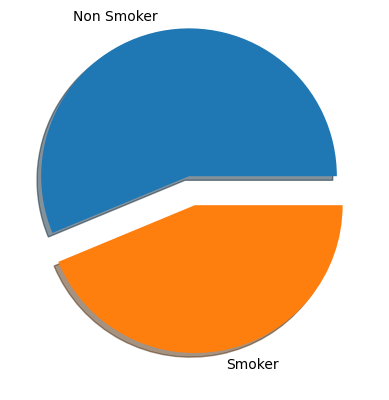

In [16]:
len_non_smoker = len(train_data["smoking"][train_data.smoking == 0])
len_smoker = len(train_data["smoking"][train_data.smoking == 1])

arr = np.array([len_non_smoker , len_smoker]) 
labels = ['Non Smoker', 'Smoker'] 
print("Total No. Of Non Smokers :- ", len_non_smoker)
print("Total No. Of Smokers :- ", len_smoker)

plt.pie(arr, labels=labels, explode = [0.2,0.0] , shadow=True) 
plt.show()

<Axes: >

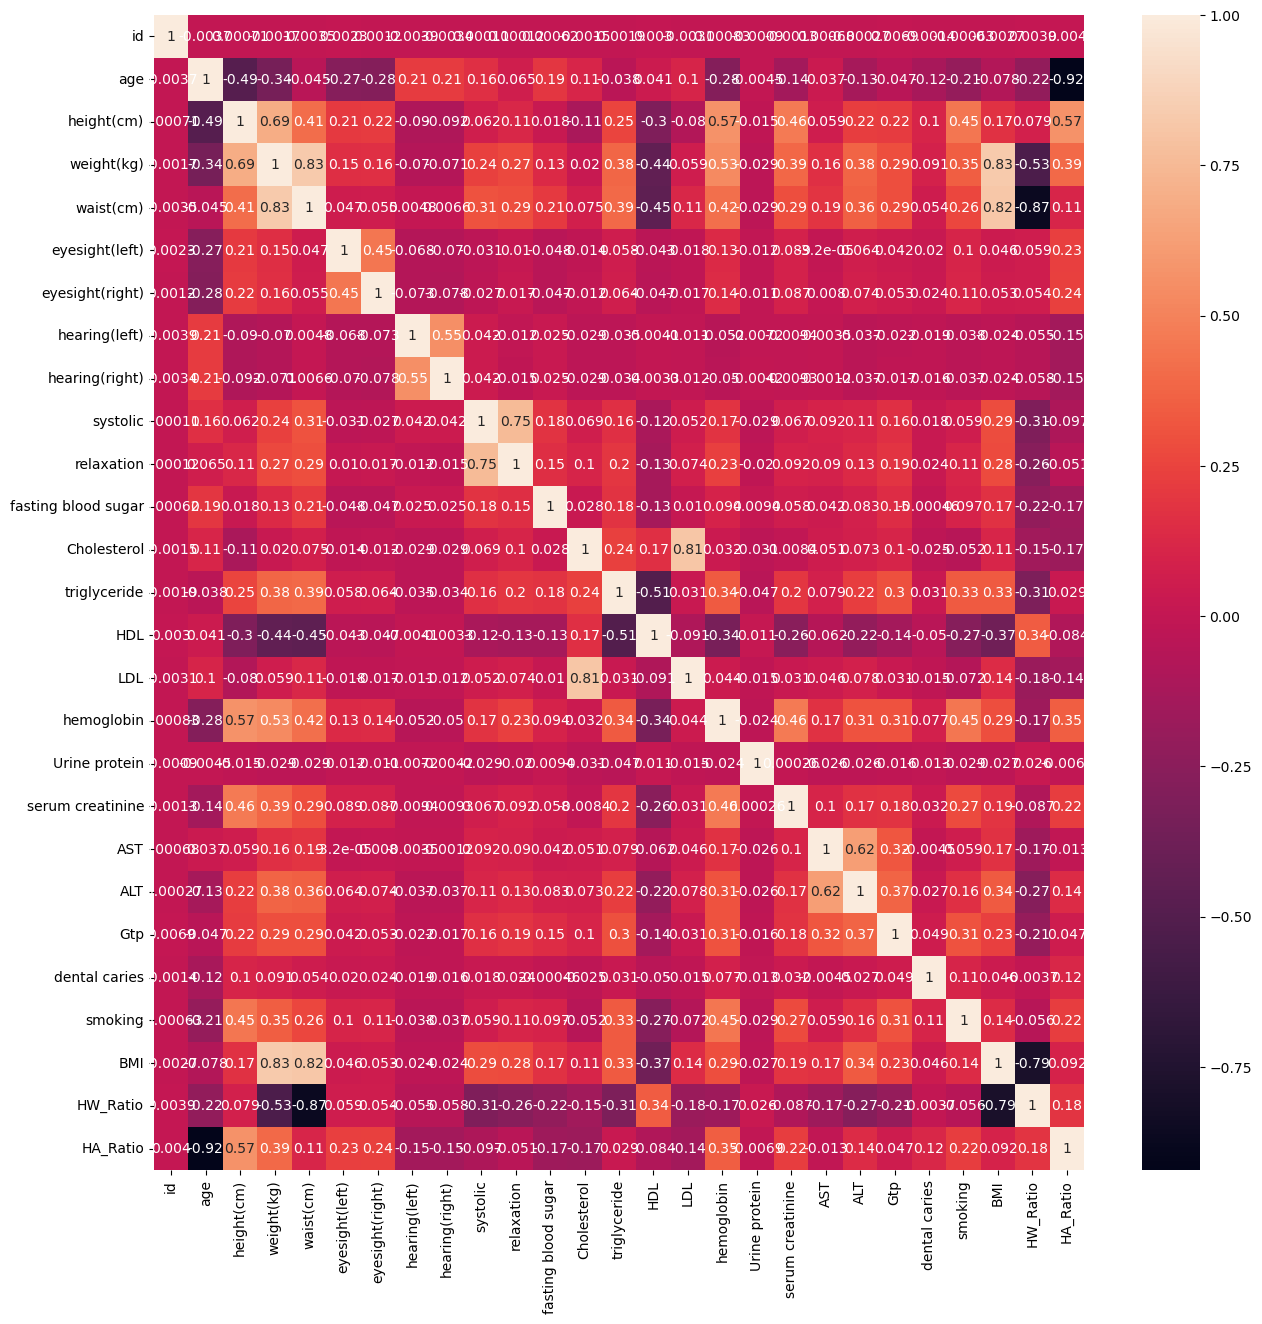

In [17]:
# checking the Correlation of our variables  

corr = train_data.corr() 
plt.subplots(figsize=(15,15))
sns.heatmap(corr, annot=True)

In [18]:
correlation_matrix = train_data.corr()
target_correlation = correlation_matrix['smoking'].abs()

# Sort by absolute correlation in descending order
sorted_correlation = target_correlation.sort_values(ascending=False)
print(sorted_correlation)

smoking                1.000000
hemoglobin             0.450679
height(cm)             0.447111
weight(kg)             0.351748
triglyceride           0.331975
Gtp                    0.305561
serum creatinine       0.272979
HDL                    0.271186
waist(cm)              0.262715
HA_Ratio               0.224441
age                    0.206033
ALT                    0.163016
BMI                    0.141723
eyesight(right)        0.109781
relaxation             0.109501
dental caries          0.106636
eyesight(left)         0.100420
fasting blood sugar    0.096534
LDL                    0.072285
AST                    0.059394
systolic               0.058642
HW_Ratio               0.056072
Cholesterol            0.051896
hearing(left)          0.038219
hearing(right)         0.036858
Urine protein          0.028548
id                     0.000632
Name: smoking, dtype: float64


In [19]:
cor_target = abs(corr["smoking"]) # absolute value of the correlation 

relevant_features = cor_target[cor_target>0.2] # highly correlated features 

names = [index for index, value in relevant_features.items()] # getting the names of the features 

print(names) # printing the features 
print(len(names))

['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'triglyceride', 'HDL', 'hemoglobin', 'serum creatinine', 'Gtp', 'smoking', 'HA_Ratio']
11


In [27]:
from pycaret.classification import *

In [28]:
model= setup(data= train_data, target= 'smoking',fold=10,session_id=660,fold_shuffle=True)

,Description,Value
0,Session id,660
1,Target,smoking
2,Target type,Binary
3,Original data shape,"(159256, 27)"
4,Transformed data shape,"(159256, 27)"
5,Transformed train set shape,"(111479, 27)"
6,Transformed test set shape,"(47777, 27)"
7,Numeric features,26
8,Preprocess,True
9,Imputation type,simple


In [29]:
lightgbm = create_model('lightgbm',boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.09367435724495182,
               max_depth=6, min_child_samples=16, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=75,
               objective=None, random_state=660, reg_alpha=0.0, reg_lambda=0.0,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7769,0.8624,0.8018,0.7199,0.7587,0.5524,0.5551
1,0.7827,0.8651,0.8086,0.7257,0.7649,0.5639,0.5668
2,0.7905,0.8695,0.8203,0.7326,0.7740,0.5798,0.5831
3,0.7816,0.8661,0.8113,0.7231,0.7647,0.5621,0.5654
4,0.7832,0.8672,0.8087,0.7266,0.7654,0.5649,0.5677
5,0.7824,0.8674,0.8035,0.7274,0.7636,0.5629,0.5653
6,0.7873,0.8684,0.8089,0.7327,0.7689,0.5728,0.5752
7,0.7886,0.8713,0.8164,0.7314,0.7716,0.5759,0.5789
8,0.7831,0.8696,0.8064,0.7273,0.7648,0.5646,0.5671


In [ ]:
caliblightgbm=calibrate_model(lightgbm)

In [ ]:
boosted = ensemble_model(lightgbm, method = 'Boosting')

In [ ]:
calibboosted = calibrate_model(boosted)

In [ ]:
boosted1 = ensemble_model(caliblightgbm, method = 'Boosting')

In [ ]:
calibboosted1 = calibrate_model(boosted1)

In [ ]:
final0 = finalize_model(calibboosted1)

In [ ]:
preds = predict_model(final0, data=test_data, raw_score=True)
preds.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': preds['prediction_score_1']})
cat_sub.to_csv('finalboosted.csv',index=False)

In [ ]:
finals = finalize_model(boosted1)

In [ ]:
pre = predict_model(finals, data=test_data, raw_score=True)
pre.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': pre['prediction_score_1']})
cat_sub.to_csv('finalboost0.csv',index=False)

In [ ]:
baggedboosted = ensemble_model(boosted, method = 'Bagging')

In [ ]:
finals = finalize_model(baggedboosted)

In [ ]:
predss = predict_model(finals, data=test_data, raw_score=True)
predss.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': predss['prediction_score_1']})
cat_sub.to_csv('baggedboosted.csv',index=False)

In [ ]:
calib= calibrate_model(baggedboosted)

In [ ]:
final1 = finalize_model(calib)

In [ ]:
preds = predict_model(final1, data=test_data, raw_score=True)
preds.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': preds['prediction_score_1']})
cat_sub.to_csv('finalbaggedboosted.csv',index=False)

In [ ]:
baggedboosted1 = ensemble_model(calibboosted, method = 'Bagging')

In [ ]:
final2 = finalize_model(baggedboosted1)

In [ ]:
preds1 = predict_model(final2, data=test_data, raw_score=True)
preds1.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': preds1['prediction_score_1']})
cat_sub.to_csv('finalbaggedboosted1.csv',index=False)

In [ ]:
calib2 = calibrate_model(baggedboosted1)

In [ ]:
final2 = finalize_model(calib2)

In [ ]:
preds2 = predict_model(final2, data=test_data, raw_score=True)
preds2.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': preds2['prediction_score_1']})
cat_sub.to_csv('finalcalibbaggedboosted1.csv',index=False)

In [ ]:
baggedboosted2 = ensemble_model(boosted1, method = 'Bagging')

In [ ]:
final3 = finalize_model(baggedboosted2)

In [ ]:
preds3 = predict_model(final3, data=test_data, raw_score=True)
preds3.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': preds3['prediction_score_1']})
cat_sub.to_csv('finalbagged1boosted2.csv',index=False)

In [ ]:
baggedboosted3 = ensemble_model(calibboosted1, method = 'Bagging')

In [ ]:
final4 = finalize_model(baggedboosted3)

In [ ]:
preds4 = predict_model(final4, data=test_data, raw_score=True)
preds4.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': preds4['prediction_score_1']})
cat_sub.to_csv('finalbagged1boosted3.csv',index=False)

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': preds4['prediction_score_1']})
cat_sub.to_csv('finalbagged1boosted3.csv',index=False)

In [ ]:
final5 = finalize_model(calib3)

In [ ]:
preds5 = predict_model(final5, data=test_data, raw_score=True)
preds5.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': preds5['prediction_score_1']})
cat_sub.to_csv('finalcalibbagged2boosted4.csv',index=False)

In [ ]:
calib4= calibrate_model(baggedboosted3)

In [ ]:
final6 = finalize_model(calib4)

In [ ]:
preds6 = predict_model(final6, data=test_data, raw_score=True)
preds6.head()

In [ ]:
cat_sub = pd.DataFrame({'id': sub['id'], 'smoking': preds6['prediction_score_1']})
cat_sub.to_csv('finalcalibbagged2boosted5.csv',index=False)